# Project: Wrangling and Analyze Data

In [1]:
# Import needed
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Part 1: Data Gathering

#### Reading the dataset manually

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.shape[0]

2356

#### Downloading the dataset programmatically

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = requests.get(url)
open('image_predictions.tsv', 'wb').write(image_pred.content)

image_pred= pd.read_csv('image_predictions.tsv', sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> Becuase I had a problem to set my Twitter account to devoloper account I decided to do the next option

#### I need 3 things at least:
> tweet ID

> Retweet count

> Like count

#### The cell below I wrote a code to read tweet-json content and append it to myList then convert myList to a DataFrame.

In [9]:
takeLine = []
myList = []
i = 0
for line in open('tweet-json.txt', 'r'):
    takeLine.append(json.loads(line))
    tweet_id = takeLine[i]['id']
    retweet_count = takeLine[i]['retweet_count']
    favorite_count = takeLine[i]['favorite_count']
    source = takeLine[i]['source']
    
    myList.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'source': source
                            })
    i +=1
    
tweet_json = pd.DataFrame(myList, columns=['tweet_id', 'favorite_count', 'retweet_count', 'source'])

> **I add the source column for additional information**

In [10]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."


In [11]:
# View how many record we have
tweet_json.shape[0]

2354

In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   source          2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


# Part 2: Assessing Data

### a.Visual assessment 

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


> I see many a's in the name column so, i must check it in the programmtic assesment

In [14]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
tweet_json

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...,...
2349,666049248165822465,111,41,"<a href=""http://twitter.com/download/iphone"" r..."
2350,666044226329800704,311,147,"<a href=""http://twitter.com/download/iphone"" r..."
2351,666033412701032449,128,47,"<a href=""http://twitter.com/download/iphone"" r..."
2352,666029285002620928,132,48,"<a href=""http://twitter.com/download/iphone"" r..."


### b.Programmatic assessment

In [16]:
twitter_archive.head() # I displayed the first three then I used .info() finction to compare the content and it's data type

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
twitter_archive.in_reply_to_status_id.unique() # This code to view the 78 values in this column

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [19]:
twitter_archive.retweeted_status_id.unique() # same here (the data type need to be fixed) or maybe dropped!

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [20]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

### Take sample to check if the ratings were extracted from the text correctly.

In [21]:
index = twitter_archive.sample()[['text','rating_numerator']].index
print(twitter_archive['text'][index[0]])
print('##############\nThe rating is:\t')
print(str(twitter_archive['rating_numerator'][index[0]])+'/'+str(twitter_archive['rating_denominator'][index[0]]))

RT @dog_rates: This is Klein. These pics were taken a month apart. He knows he's a stud now. 12/10 total heartthrob https://t.co/guDkLrX8zV
##############
The rating is:	
12/10


In [22]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Vinnie       1
Fynn         1
Karl         1
Mac          1
Geoff        1
Name: name, Length: 957, dtype: int64

**There are 55 dogs named a. there is problem here because a is not a name!**

In [23]:
twitter_archive[twitter_archive.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [24]:
twitter_archive['text'][1340] 

'Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu'

> After checking some of the text for dogs named a, I found that they didn't mention their names in the text. 

In [25]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,tennis_ball,0.176495,False,badger,0.059905,False,Norwegian_elkhound,0.056850,True
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True
575,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,Labrador_retriever,0.338757,True,flat-coated_retriever,0.304470,True,chest,0.093392,False
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
1957,865006731092295680,https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg,1,Pembroke,0.989882,True,Cardigan,0.009906,True,basenji,0.000135,True
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
1995,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True


In [26]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,source
834,767884188863397888,5309,1634,"<a href=""http://twitter.com/download/iphone"" r..."
679,788908386943430656,30653,14409,"<a href=""http://twitter.com/download/iphone"" r..."
386,826598799820865537,5637,292,"<a href=""http://twitter.com/download/iphone"" r..."
296,837110210464448512,17480,2731,"<a href=""http://twitter.com/download/iphone"" r..."
859,763103485927849985,8163,2602,"<a href=""http://twitter.com/download/iphone"" r..."


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   source          2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


In [29]:
tweet_json.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


#### Check for any duplcated data

In [30]:
twitter_archive[twitter_archive.duplicated() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
image_pred[image_pred.duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
tweet_json[tweet_json.duplicated() == True]

,tweet_id,favorite_count,retweet_count,source


**There's no duplicated data to the three tables**

> ------------------------------------------------------------------

### Quality Issues

**`twitter_archive` table**

>There're 6 columns have missing data.

>Wrong Data type in **timestamp** column.

> Many column has the wrong data type **(retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id
,in_reply_to_status_id, in_reply_to_user_id )**

> incompatible ID data type, **tweet_json.tweet_id** is string and the other two table are int.

> Unreasonable name for 55 dogs named **a**.

> some of the columns unnecessary such as: **retweeted_status_id,**	**retweeted_status_user_id** and	**retweeted_status_timestamp**,

> Some Of the denominators isn't 10.

> Wrong datatype for favorite_count and retweet_count columns.


### Tidiness issues

> **1.** No need for four columns(doggo,	floofer,	pupper and	puppo), make it one column that specifies the dog stage or type.

> **2.** tweet-json table: no need for a separated table, It can be joined with Twitter archive in one table.

> **3.** New column needed for dog breed



# Part 3: Cleaning

#### Before I start the cleaning processes, I need to copy the 3 tables into a copy versions to save the original dataset from any mistake.


In [33]:

twitter_archive_copy = twitter_archive.copy()
image_pred_copy = image_pred.copy()
tweet_json_copy = tweet_json.copy()
##-------------------------------------------------------------------------

#### Check the tables if they copied successfully.

In [34]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
tweet_json_copy.head()

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."


I'm going to follow:

* define

* code

* test

framework and clearly document it.

### define

**I'll strat with the tidiness issues first,**

#### 1.Get rid of the four columns(doggo, floofer, pupper and puppo) and make it one column that specifies the dog stage or type.

### Code

In [37]:
doggo_index = twitter_archive_copy[twitter_archive_copy['doggo'] == 'doggo'].index
floofer_index = twitter_archive_copy[twitter_archive_copy['floofer'] == 'floofer'].index
pupper_index = twitter_archive_copy[twitter_archive_copy['pupper'] == 'pupper'].index
puppo_index = twitter_archive_copy[twitter_archive_copy['puppo'] == 'puppo'].index
#--------
twitter_archive_copy.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### drop the four columns

In [38]:
twitter_archive_copy.drop(columns=['doggo','floofer','pupper','puppo'], inplace= True)

In [39]:
# Check if they are deleted
twitter_archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas


#### ADD new column specifies the dog stage.

In [40]:
twitter_archive_copy['stage'] = 'Unspecified'

In [41]:
twitter_archive_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,Unspecified


#### Now I can add dog stage we saved above by using it's index

In [42]:
twitter_archive_copy.loc[doggo_index,'stage'] = 'doggo'
twitter_archive_copy.loc[floofer_index,'stage'] = 'floofer'
twitter_archive_copy.loc[pupper_index,'stage'] = 'pupper'
twitter_archive_copy.loc[puppo_index,'stage'] = 'puppo'

### Test

In [43]:
# Check
print(twitter_archive_copy.loc[doggo_index,'stage'][:3])
print(twitter_archive_copy.loc[floofer_index,'stage'][:3])
print(twitter_archive_copy.loc[pupper_index,'stage'][:3])
print(twitter_archive_copy.loc[puppo_index,'stage'][:3])

9     doggo
43    doggo
99    doggo
Name: stage, dtype: object
46     floofer
200    floofer
582    floofer
Name: stage, dtype: object
29    pupper
49    pupper
56    pupper
Name: stage, dtype: object
12    puppo
14    puppo
71    puppo
Name: stage, dtype: object


In [44]:
twitter_archive_copy.stage.value_counts()

Unspecified    1976
pupper          257
doggo            83
puppo            30
floofer          10
Name: stage, dtype: int64

### Define

**2.tweet-json table: no need for a separated table, It can be joined with Twitter archive in one table.**

In [45]:
tweet_json_copy.drop(columns='source', inplace= True)

In [46]:
#check
tweet_json_copy.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Before i can proceed, I must fix important quality issue which is:
**incompatible ID data type, `tweet_json`.tweet_id is string and the other two table are int.**
**I'll convert all the id's into strings so that I can merge the tables.**

In [47]:
twitter_archive_copy['tweet_id'] = twitter_archive_copy.tweet_id.astype(str)
# Check
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2356 

In [48]:
image_pred_copy['tweet_id'] = image_pred_copy.tweet_id.astype(str)
# Check
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Now we can merge

In [49]:
twitter_archive_copy = pd.merge(twitter_archive_copy, tweet_json_copy,
                            on = 'tweet_id', how='left')

#### Test

In [50]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unspecified,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unspecified,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unspecified,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unspecified,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unspecified,41048.0,9774.0


#### I decided to merge `image_pred` table also with `twitter_archive_copy` table

#### Code

In [51]:
image_pred_copy.shape[0]

2075

In [52]:
twitter_archive_copy = pd.merge(twitter_archive_copy, image_pred_copy,
                            on = 'tweet_id')

#### Test

In [53]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Now I'm going to fix and clean the quality Issues.

### Define

**Many column has the wrong data type (retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id ,in_reply_to_status_id, in_reply_to_user_id) and also we don't need them. So, I'll drop them** 

### Code

In [54]:
twitter_archive_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace= True)

### Test

In [55]:
twitter_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unspecified,39467.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Define 

**Wrong Data type in timestamp column.**

### Code

In [56]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   object 
 1   timestamp           2075 non-null   object 
 2   source              2075 non-null   object 
 3   text                2075 non-null   object 
 4   expanded_urls       2075 non-null   object 
 5   rating_numerator    2075 non-null   int64  
 6   rating_denominator  2075 non-null   int64  
 7   name                2075 non-null   object 
 8   stage               2075 non-null   object 
 9   favorite_count      2073 non-null   float64
 10  retweet_count       2073 non-null   float64
 11  jpg_url             2075 non-null   object 
 12  img_num             2075 non-null   int64  
 13  p1                  2075 non-null   object 
 14  p1_conf             2075 non-null   float64
 15  p1_dog              2075 non-null   bool   
 16  p2    

In [57]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

In [58]:
twitter_archive_copy['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Test 


In [59]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                2075 non-null   object             
 8   stage               2075 non-null   object             
 9   favorite_count      2073 non-null   float64            
 10  retweet_count       2073 non-null   float64            
 11  jpg_url             2075 non-null   object             
 12  img_num             2075 non-null 

In [60]:
twitter_archive_copy['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2070   2015-11-16 00:24:50+00:00
2071   2015-11-16 00:04:52+00:00
2072   2015-11-15 23:21:54+00:00
2073   2015-11-15 23:05:30+00:00
2074   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2075, dtype: datetime64[ns, UTC]

### Define

**Unreasonable name for 55 dogs named a!**

### Code

In [61]:
twitter_archive_copy[twitter_archive_copy.name == 'a'].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
51,881536004380872706,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper,50199.0,...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
525,792913359805018113,2016-10-31 02:17:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,Unspecified,16063.0,...,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
648,772581559778025472,2016-09-04 23:46:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,Unspecified,7192.0,...,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
824,747885874273214464,2016-06-28 20:14:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,Unspecified,3243.0,...,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
826,747816857231626240,2016-06-28 15:40:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,Unspecified,5346.0,...,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True


In [62]:
twitter_archive_copy.name = twitter_archive_copy.name.str.replace('^[a-z]+', 'None')

<ipython-input-62-c6047f755e85>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_copy.name = twitter_archive_copy.name.str.replace('^[a-z]+', 'None')


### Test

In [63]:
twitter_archive_copy.name.value_counts()

None       678
Charlie     11
Cooper      10
Oliver      10
Penny       10
          ... 
Pawnd        1
Bloo         1
Pablo        1
Darrel       1
Asher        1
Name: name, Length: 914, dtype: int64

### Define
#### Some Of the denominators isn't 10. I'll drop all rating_denominator that is not 10

### Code

In [64]:
twitter_archive_copy.rating_denominator.value_counts()

10     2057
50        3
80        2
11        2
2         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
Name: rating_denominator, dtype: int64

In [65]:
non_ten = twitter_archive_copy[twitter_archive_copy['rating_denominator'] != 10].index
twitter_archive_copy.drop(index=non_ten, inplace=True)

### Test

In [66]:
twitter_archive_copy.rating_denominator.value_counts()

10    2057
Name: rating_denominator, dtype: int64

In [67]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   source              2057 non-null   object             
 3   text                2057 non-null   object             
 4   expanded_urls       2057 non-null   object             
 5   rating_numerator    2057 non-null   int64              
 6   rating_denominator  2057 non-null   int64              
 7   name                2057 non-null   object             
 8   stage               2057 non-null   object             
 9   favorite_count      2055 non-null   float64            
 10  retweet_count       2055 non-null   float64            
 11  jpg_url             2057 non-null   object             
 12  img_num             2057 non-null 

### Define

#### Drop any remaining missing values

### Code

In [68]:
twitter_archive_copy.dropna(inplace= True)

### Test

In [69]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2055 non-null   object             
 1   timestamp           2055 non-null   datetime64[ns, UTC]
 2   source              2055 non-null   object             
 3   text                2055 non-null   object             
 4   expanded_urls       2055 non-null   object             
 5   rating_numerator    2055 non-null   int64              
 6   rating_denominator  2055 non-null   int64              
 7   name                2055 non-null   object             
 8   stage               2055 non-null   object             
 9   favorite_count      2055 non-null   float64            
 10  retweet_count       2055 non-null   float64            
 11  jpg_url             2055 non-null   object             
 12  img_num             2055 non-null 

### Define

Wrong datatype for **favorite_count**, Convert it to integer.

### Code

In [70]:
twitter_archive_copy['favorite_count'] = twitter_archive_copy['favorite_count'].astype(int)

### Test

In [71]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2055 non-null   object             
 1   timestamp           2055 non-null   datetime64[ns, UTC]
 2   source              2055 non-null   object             
 3   text                2055 non-null   object             
 4   expanded_urls       2055 non-null   object             
 5   rating_numerator    2055 non-null   int64              
 6   rating_denominator  2055 non-null   int64              
 7   name                2055 non-null   object             
 8   stage               2055 non-null   object             
 9   favorite_count      2055 non-null   int32              
 10  retweet_count       2055 non-null   float64            
 11  jpg_url             2055 non-null   object             
 12  img_num             2055 non-null 

### Define

#### Wrong data type for retweet_count column, Covert it to Integer. 

### Code

In [72]:
twitter_archive_copy['retweet_count'] = twitter_archive_copy['retweet_count'].astype(int)

### Test

In [73]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2055 non-null   object             
 1   timestamp           2055 non-null   datetime64[ns, UTC]
 2   source              2055 non-null   object             
 3   text                2055 non-null   object             
 4   expanded_urls       2055 non-null   object             
 5   rating_numerator    2055 non-null   int64              
 6   rating_denominator  2055 non-null   int64              
 7   name                2055 non-null   object             
 8   stage               2055 non-null   object             
 9   favorite_count      2055 non-null   int32              
 10  retweet_count       2055 non-null   int32              
 11  jpg_url             2055 non-null   object             
 12  img_num             2055 non-null 

### Define

#### Making new column for dog breed

### Code

In [74]:
twitter_archive_copy['dog_breed'] = 'Unspecified'

In [75]:
twitter_archive_copy.sample(4).iloc()[:,13:]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
682,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True,Unspecified
840,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False,Unspecified
733,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True,Unspecified
1724,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True,Unspecified


In [76]:
for index, pred in twitter_archive_copy.iterrows():
    
    if pred.p1_dog:
        twitter_archive_copy.loc[index,'dog_breed'] = pred.p1
        continue
        
    elif pred.p2_dog:
        twitter_archive_copy.loc[index,'dog_breed'] = pred.p2
        continue
        
    elif pred.p3_dog:
        twitter_archive_copy.loc[index,'dog_breed'] = pred.p3
        continue
        
    else:
        twitter_archive_copy.loc[index,'dog_breed'] = 'Unspecified'

# Test

In [77]:
# Check
twitter_archive_copy.sample(10).iloc()[:,13:]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
1285,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False,Lhasa
1449,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False,Unspecified
370,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True,Doberman
1862,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False,Unspecified
1448,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True,pug
670,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True,pug
651,Labrador_retriever,0.217821,True,beagle,0.157677,True,golden_retriever,0.127726,True,Labrador_retriever
1241,groenendael,0.550796,True,Norwegian_elkhound,0.154770,True,schipperke,0.080802,True,groenendael
1951,trombone,0.390339,False,cornet,0.314149,False,French_horn,0.255182,False,Unspecified
1707,Chihuahua,0.292343,True,pug,0.173364,True,French_bulldog,0.045507,True,Chihuahua


In [78]:
twitter_archive_copy.dog_breed.value_counts()

Unspecified             322
golden_retriever        169
Labrador_retriever      110
Pembroke                 95
Chihuahua                94
                       ... 
Scotch_terrier            1
clumber                   1
Bouvier_des_Flandres      1
silky_terrier             1
Irish_wolfhound           1
Name: dog_breed, Length: 114, dtype: int64

> After I check the predictions and the dog breed, I found that I extract all the correct predictions successfully.

> **Now, some of the columns are no longer needed for the analysis, so I'm going to drop them.**

In [79]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_breed'],
      dtype='object')

In [80]:
twitter_archive_copy.drop(columns=['p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'source'], inplace=True)

In [81]:
twitter_archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unspecified,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unspecified
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unspecified,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unspecified,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unspecified,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unspecified,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset


## --------------- Storing Data --------------- ##

In [82]:
twitter_archive_copy.to_csv('twitter_archive_master.csv', index= False)

> -----------------------------------------------------------------

# Part 5: Analyzing and Visualizing Data

### Insights:
1. The most dog stage get more likes.

2. The most Popular dog names.

3. Which dog breed get higher ratings.

In [83]:
df = pd.read_csv('twitter_archive_master.csv')

In [84]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unspecified,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unspecified
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unspecified,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unspecified,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unspecified,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unspecified,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset


### The most dog stage get more likes (excluding Unspecified dog)

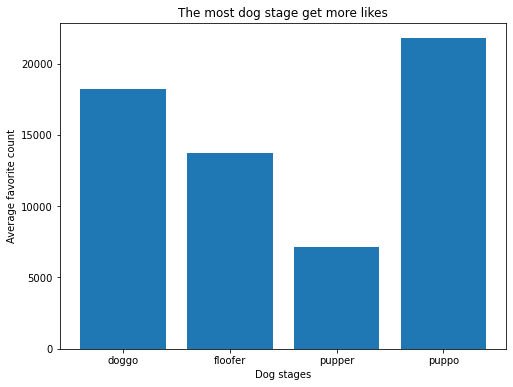

In [85]:
## The most dog stage get more likes (excluding Unspecified dog)
h = df.groupby('stage')['favorite_count'].mean().values[1:]
names = ['doggo', 'floofer', 'pupper', 'puppo']
plt.figure(figsize=(8, 6))
plt.bar(names, h)
plt.title('The most dog stage get more likes')
plt.ylabel('Average favorite count')
plt.xlabel('Dog stages')
plt.show()

In [86]:
df.stage.value_counts()

Unspecified    1735
pupper          221
doggo            67
puppo            24
floofer           8
Name: stage, dtype: int64

### The most dog stage get more retweet (excluding Unspecified dog)

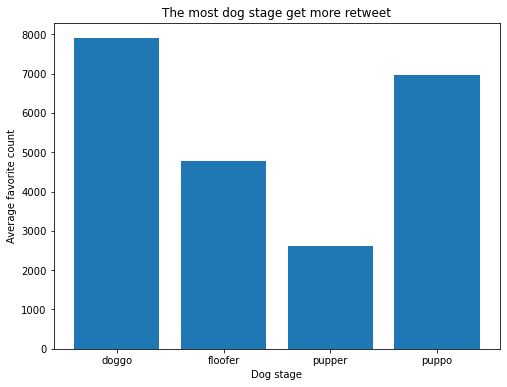

In [87]:
## The most dog stage get more retweet (excluding Unspecified dog)
h = df.groupby('stage')['retweet_count'].mean().values[1:]
names = ['doggo', 'floofer', 'pupper', 'puppo']
plt.figure(figsize=(8, 6))
plt.bar(names, h)
plt.title('The most dog stage get more retweet')
plt.ylabel('Average favorite count')
plt.xlabel('Dog stage')
plt.show()

In [88]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'dog_breed'],
      dtype='object')

### Popular dog names

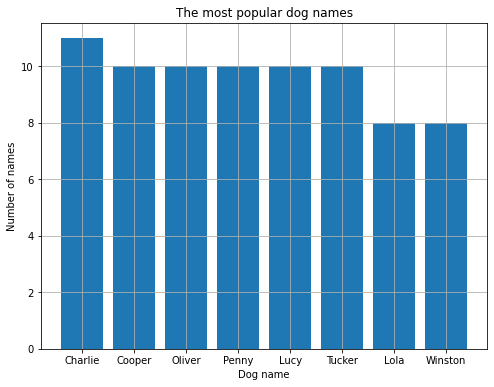

In [89]:
dog_names = df.name.value_counts()[1:9]
plt.figure(figsize=(8, 6))
plt.bar(dog_names.index, dog_names.values)
plt.title('The most popular dog names')
plt.ylabel('Number of names')
plt.xlabel('Dog name')
plt.grid()
plt.show()

In [92]:
dog_names

Charlie    11
Cooper     10
Oliver     10
Penny      10
Lucy       10
Tucker     10
Lola        8
Winston     8
Name: name, dtype: int64

### Which dog breed get higher ratings.

In [90]:
df.rating_numerator.value_counts()

12      473
10      429
11      413
13      283
9       150
8        95
7        51
14       40
5        34
6        32
3        19
4        15
2         9
1         4
0         2
15        1
27        1
1776      1
420       1
26        1
75        1
Name: rating_numerator, dtype: int64

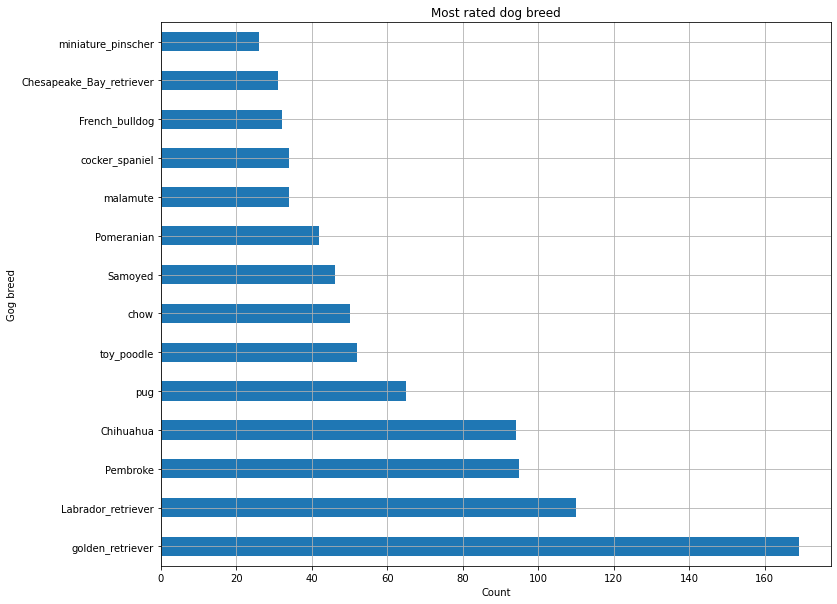

In [91]:
plt.figure(figsize=(12, 10))
df['dog_breed'].value_counts()[1:15].plot(kind = 'barh')
plt.title('Most rated dog breed')
plt.xlabel('Count')
plt.ylabel('Gog breed');
plt.grid()
plt.show()